In [1]:
# load vgg model
from keras.applications import vgg16
# load the model
model = vgg16.VGG16()
# summarize the model
model.summary()

2022-10-19 16:37:01.092169: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [2]:
# summarize filters in each convolutional layer
from matplotlib import pyplot
# summarize filter shapes
for layer in model.layers:
	# check for convolutional layer
	if 'conv' not in layer.name:
		continue
	# get filter weights
	filters, biases = layer.get_weights()
	print(layer.name, filters.shape)

block1_conv1 (3, 3, 3, 64)
block1_conv2 (3, 3, 64, 64)
block2_conv1 (3, 3, 64, 128)
block2_conv2 (3, 3, 128, 128)
block3_conv1 (3, 3, 128, 256)
block3_conv2 (3, 3, 256, 256)
block3_conv3 (3, 3, 256, 256)
block4_conv1 (3, 3, 256, 512)
block4_conv2 (3, 3, 512, 512)
block4_conv3 (3, 3, 512, 512)
block5_conv1 (3, 3, 512, 512)
block5_conv2 (3, 3, 512, 512)
block5_conv3 (3, 3, 512, 512)


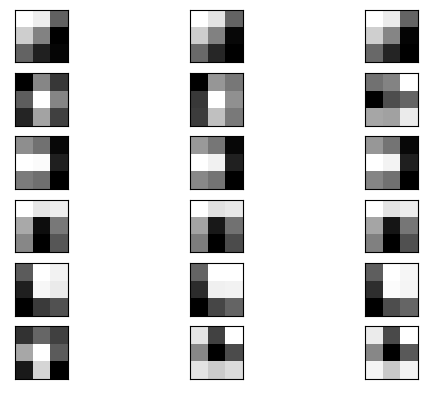

In [3]:
from keras.applications.vgg16 import VGG16
from matplotlib import pyplot
# retrieve weights from the second hidden layer
filters, biases = model.layers[1].get_weights()
# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)
# plot first few filters
n_filters, ix = 6, 1
for i in range(n_filters):
	# get the filter
	f = filters[:, :, :, i]
	# plot each channel separately
	for j in range(3):
		# specify subplot and turn of axis
		ax = pyplot.subplot(n_filters, 3, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		pyplot.imshow(f[:, :, j], cmap='gray')
		ix += 1
# show the figure
pyplot.show()

In [4]:

# visualize feature maps output from each block in the vgg model
from keras.applications.vgg16 import VGG16

from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array 

# from keras.utils import load_img
# from keras.utils import img_to_array

from keras.models import Model
from matplotlib import pyplot
from numpy import expand_dims
# load the model
model = VGG16()
# redefine model to output right after the first hidden layer
ixs = [2, 5, 9, 13, 17]

outputs = [model.layers[i].output for i in ixs]
model = Model(inputs=model.inputs, outputs=outputs)

# load the image with the required shape
img = load_img('draak.webp', target_size=(224, 224))

# convert the image to an array
img = img_to_array(img)

# expand dimensions so that it represents a single 'sample'
img = expand_dims(img, axis=0)

# prepare the image (e.g. scale pixel values for the vgg)
img = preprocess_input(img)

# get feature map for first hidden layer
feature_maps = model.predict(img)


# plot the output from each block
square = 8

for fmap in feature_maps:
	# plot all 64 maps in an 8x8 squares
	ix = 1
	for _ in range(square):
		for _ in range(square):
			# specify subplot and turn of axis
			ax = pyplot.subplot(square, square, ix)
			ax.set_xticks([])
			ax.set_yticks([])
			# plot filter channel in grayscale
			pyplot.imshow(fmap[0, :, :, ix-1], cmap='gray')
			ix += 1
	# show the figure
	# pyplot.show()

NameError: name 'preprocess_input' is not defined

In [5]:
# Print prediction 
from keras.applications import vgg16
model = vgg16.VGG16()
predict_img = model.predict(img)
predict_img

array([[8.67245603e-07, 1.31448851e-05, 8.65171751e-06, 1.75680834e-04,
        2.67811789e-04, 1.19012024e-03, 4.00671452e-05, 1.47679573e-04,
        2.27384644e-05, 4.04595514e-04, 2.36525466e-06, 4.65493201e-07,
        2.25714102e-05, 6.25922553e-07, 2.89232321e-05, 2.06108075e-06,
        3.20319691e-06, 1.10547830e-04, 5.10608561e-06, 9.58797409e-06,
        5.68458290e-06, 1.33735724e-02, 3.05539434e-04, 3.56404833e-03,
        2.49035249e-04, 4.17172305e-05, 6.43054882e-05, 6.36689001e-05,
        2.46079202e-04, 7.78678368e-05, 2.22906783e-06, 1.35914559e-06,
        2.23608004e-05, 3.71418835e-04, 3.55387968e-03, 1.24048020e-05,
        7.08950174e-05, 8.04255978e-06, 6.10865653e-03, 3.45767196e-03,
        1.71352549e-05, 1.84616540e-04, 8.43883434e-04, 5.59676485e-03,
        7.32148328e-05, 1.28359770e-05, 4.48794490e-05, 2.41157762e-03,
        7.63768458e-06, 4.10892098e-04, 4.31193970e-04, 6.83306098e-01,
        2.00050963e-05, 4.71988596e-06, 3.64980806e-05, 8.823287

In [8]:
#Let's predict top 5 results
top_five_predict = vgg16.decode_predictions(predict_img, top=5)
top_five_predict

[[('n01704323', 'triceratops', 0.6833061),
  ('n01943899', 'conch', 0.08146915),
  ('n01795545', 'black_grouse', 0.052034397),
  ('n02417914', 'ibex', 0.021999575),
  ('n01608432', 'kite', 0.013373572)]]